In [3]:
import osgeo
from os.path import join as pjoin
import rioxarray

scratch_dir = './data' 


tss = rioxarray.open_rasterio(pjoin(scratch_dir, 'resampledNDWI.tif'))
tss


<xarray.DataArray (band: 31, y: 4865, x: 3160)>
[476575400 values with dtype=float64]
Coordinates:
  * band         (band) int32 1 2 3 4 5 6 7 8 9 ... 23 24 25 26 27 28 29 30 31
  * x            (x) float64 86.44 86.44 86.44 86.44 ... 87.42 87.42 87.42 87.42
  * y            (y) float64 28.2 28.2 28.2 28.2 ... 26.87 26.87 26.87 26.87
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     stackstac-88be6117e10650272c1453445066b44a

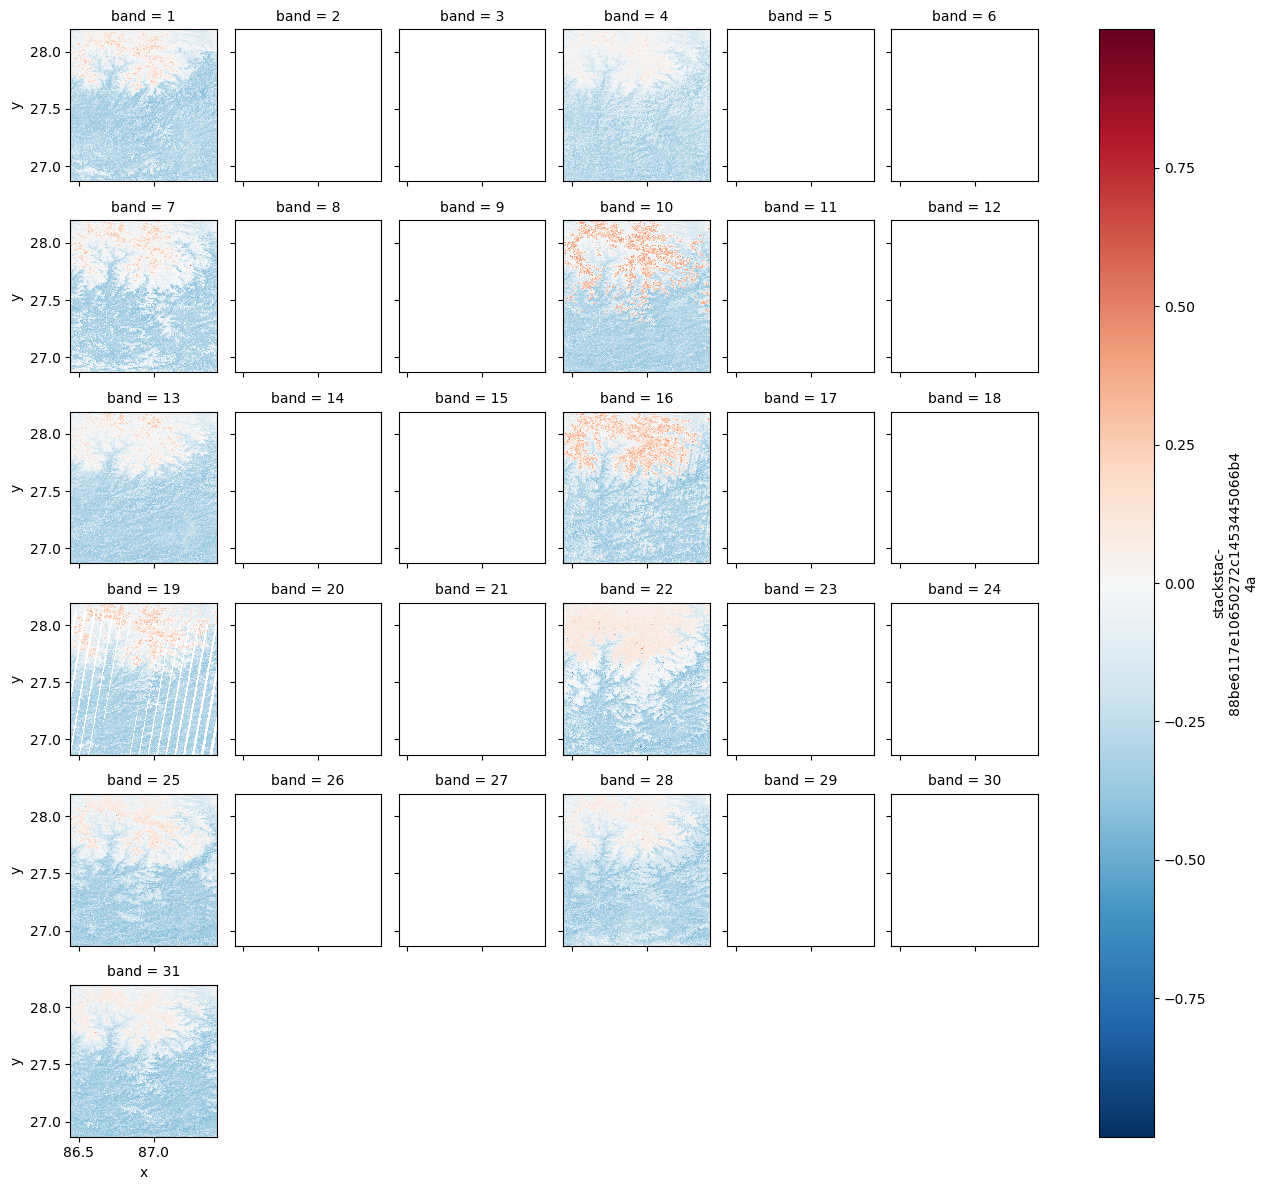

In [6]:
tss.plot.imshow(col="band",  col_wrap=6, size=2) 